## COVID & RARs

In [32]:
import numpy as np
import pandas as pd
import os
import datetime as dt

d = pd.read_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/sleep_diaries/WearableAssessment-SleepSurveys_DATA_2020-08-08_1654.csv', parse_dates = ['session1_date'])
d['session1_date'] = d['session1_date'].ffill()
d['age_group'] = d['age_group'].ffill()
d['COVID'] = np.where(d['session1_date'] <= dt.datetime.strptime('03/14/2020', '%m/%d/%Y'), 'Pre', 'Post')
d['age_group'] = np.where(d['age_group'] == 2.0, "Older Adults", "Younger Adults")
d = d[d['redcap_event_name'].str.contains('day')]
d

,session1_date,record_id,redcap_event_name,age_group,gender,global_psqi,sleep_diary_date,bed_time_0fbbb9,sleep_time,sleep_minutes,...,activities___20,activities___21,activities___22,activities___23,activities___24,activities___25,activities___26,activities___27,daily_sleep_survey_complete,COVID
2,2019-10-24 17:31:00,11,day_1_arm_1,Younger Adults,NaN,NaN,NaN,20:30,20:45,10.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,Pre
3,2019-10-24 17:31:00,11,day_2_arm_1,Younger Adults,NaN,NaN,NaN,22:00,22:45,5.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,Pre
4,2019-10-24 17:31:00,11,day_3_arm_1,Younger Adults,NaN,NaN,NaN,22:10,22:15,15.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,Pre
5,2019-10-24 17:31:00,11,day_4_arm_1,Younger Adults,NaN,NaN,NaN,23:45,00:05,5.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,Pre
6,2019-10-24 17:31:00,11,day_5_arm_1,Younger Adults,NaN,NaN,NaN,23:15,23:27,3.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,Pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,2020-08-04 10:00:00,127,day_4_arm_1,Older Adults,NaN,NaN,2020-08-08,22:50,23:15,10.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,Post
466,2020-08-04 09:30:00,129,day_1_arm_1,Older Adults,NaN,NaN,2020-08-05,22:45,11:00,15.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,Post
467,2020-08-04 09:30:00,129,day_2_arm_1,Older Adults,NaN,NaN,2020-08-06,23:00,23:10,10.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,Post
468,2020-08-04 09:30:00,129,day_3_arm_1,Older Adults,NaN,NaN,2020-08-07,23:00,23:20,10.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,Post


In [33]:
cols = pd.read_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/sleep_diaries/WearableAssessment-SleepSurveys_DATA_LABELS_2020-08-08_1643.csv').columns
cols = cols[cols.str.contains('Which of the following did you do yesterday?')].tolist()
cols = [i.split('choice=', 1)[1] for i in cols]
cols = [i.split(')', 1)[0] for i in cols]
cols = ['record_id', 'age_group'] + cols + ['COVID']
cols

['record_id',
 'age_group',
 'Attending classes, meetings',
 'Being physically animated, moving around',
 'Browsing the internet',
 'Commuting, traveling',
 'Doing a favor, helping others',
 'Doing household chores',
 'Doing nothing (sitting around, daydreaming',
 'Drinking, eating',
 'Exercising, physical activity, sports',
 'Hygienic activities (grooming, showering',
 'Listening to music',
 'Playing a game',
 'Reading',
 'Resting, napping',
 'Running errands',
 'Studying',
 'Shopping',
 'Spiritual, religious activity',
 'Talking, socializing in person',
 'Texting, talking on the phone',
 'Thinking, reflecting',
 'Using social media',
 'Using a computer',
 'Walking, running',
 'Watching TV, movies',
 'Working',
 'None of the above',
 'COVID']

In [34]:
d = d.filter(regex = 'record_id|age_group|COVID|activities*')
d.columns = cols
d

,record_id,age_group,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",Doing household chores,"Doing nothing (sitting around, daydreaming","Drinking, eating",...,"Talking, socializing in person","Texting, talking on the phone","Thinking, reflecting",Using social media,Using a computer,"Walking, running","Watching TV, movies",Working,None of the above,COVID
2,11,Younger Adults,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Pre
3,11,Younger Adults,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,Pre
4,11,Younger Adults,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,Pre
5,11,Younger Adults,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,Pre
6,11,Younger Adults,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,Pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,127,Older Adults,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Post
466,129,Older Adults,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,Post
467,129,Older Adults,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,Post
468,129,Older Adults,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,Post


In [35]:
df = d.groupby(['record_id', 'age_group', 'COVID'], group_keys = ['age_group', 'COVID']).mean()
df = df.reset_index()
df

,record_id,age_group,COVID,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",Doing household chores,"Doing nothing (sitting around, daydreaming",...,"Spiritual, religious activity","Talking, socializing in person","Texting, talking on the phone","Thinking, reflecting",Using social media,Using a computer,"Walking, running","Watching TV, movies",Working,None of the above
0,11,Younger Adults,Pre,0.000000,0.461538,1.000000,1.000000,0.000000,0.307692,0.153846,...,0.000000,1.000000,1.000000,0.000000,0.076923,0.923077,0.923077,0.538462,1.000000,0.0
1,12,Younger Adults,Pre,0.642857,0.285714,1.000000,0.857143,0.071429,0.642857,0.214286,...,0.142857,0.428571,0.000000,0.071429,0.857143,1.000000,0.571429,0.571429,0.285714,0.0
2,14,Younger Adults,Pre,0.000000,0.416667,0.833333,0.500000,0.000000,0.500000,0.583333,...,0.000000,0.583333,0.250000,0.083333,0.583333,0.583333,0.333333,1.000000,0.416667,0.0
3,16,Younger Adults,Pre,0.571429,0.071429,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.857143,0.857143,0.071429,1.000000,0.928571,0.857143,0.928571,0.714286,0.0
4,23,Younger Adults,Pre,0.785714,0.500000,0.785714,0.071429,0.214286,0.142857,0.142857,...,0.000000,0.214286,0.714286,0.142857,0.142857,0.428571,0.214286,0.285714,0.000000,0.0
5,24,Younger Adults,Pre,0.769231,0.923077,1.000000,0.153846,0.384615,0.076923,0.923077,...,0.076923,1.000000,1.000000,0.846154,0.923077,0.769231,0.923077,0.692308,0.000000,0.0
6,25,Younger Adults,Pre,0.428571,0.857143,0.500000,0.142857,0.000000,0.214286,0.500000,...,0.000000,0.857143,0.928571,0.000000,0.928571,0.857143,0.071429,0.857143,0.000000,0.0
7,33,Younger Adults,Pre,0.615385,0.692308,0.846154,0.923077,0.000000,0.384615,0.307692,...,0.000000,0.615385,0.846154,0.615385,0.923077,1.000000,0.923077,1.000000,0.692308,0.0
8,35,Younger Adults,Pre,0.500000,1.000000,1.000000,0.916667,0.916667,0.583333,1.000000,...,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.416667,0.000000,0.0
9,38,Younger Adults,Pre,0.666667,0.866667,1.000000,0.066667,0.466667,0.466667,0.066667,...,0.000000,1.000000,0.933333,0.400000,1.000000,0.533333,1.000000,0.800000,0.333333,0.0


In [36]:
ya = df[df['age_group'] == "Younger Adults"]
oa = df[df['age_group'] == "Older Adults"]

In [37]:
ya

,record_id,age_group,COVID,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",Doing household chores,"Doing nothing (sitting around, daydreaming",...,"Spiritual, religious activity","Talking, socializing in person","Texting, talking on the phone","Thinking, reflecting",Using social media,Using a computer,"Walking, running","Watching TV, movies",Working,None of the above
0,11,Younger Adults,Pre,0.000000,0.461538,1.000000,1.000000,0.000000,0.307692,0.153846,...,0.000000,1.000000,1.000000,0.000000,0.076923,0.923077,0.923077,0.538462,1.000000,0.0
1,12,Younger Adults,Pre,0.642857,0.285714,1.000000,0.857143,0.071429,0.642857,0.214286,...,0.142857,0.428571,0.000000,0.071429,0.857143,1.000000,0.571429,0.571429,0.285714,0.0
2,14,Younger Adults,Pre,0.000000,0.416667,0.833333,0.500000,0.000000,0.500000,0.583333,...,0.000000,0.583333,0.250000,0.083333,0.583333,0.583333,0.333333,1.000000,0.416667,0.0
3,16,Younger Adults,Pre,0.571429,0.071429,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.857143,0.857143,0.071429,1.000000,0.928571,0.857143,0.928571,0.714286,0.0
4,23,Younger Adults,Pre,0.785714,0.500000,0.785714,0.071429,0.214286,0.142857,0.142857,...,0.000000,0.214286,0.714286,0.142857,0.142857,0.428571,0.214286,0.285714,0.000000,0.0
5,24,Younger Adults,Pre,0.769231,0.923077,1.000000,0.153846,0.384615,0.076923,0.923077,...,0.076923,1.000000,1.000000,0.846154,0.923077,0.769231,0.923077,0.692308,0.000000,0.0
6,25,Younger Adults,Pre,0.428571,0.857143,0.500000,0.142857,0.000000,0.214286,0.500000,...,0.000000,0.857143,0.928571,0.000000,0.928571,0.857143,0.071429,0.857143,0.000000,0.0
7,33,Younger Adults,Pre,0.615385,0.692308,0.846154,0.923077,0.000000,0.384615,0.307692,...,0.000000,0.615385,0.846154,0.615385,0.923077,1.000000,0.923077,1.000000,0.692308,0.0
8,35,Younger Adults,Pre,0.500000,1.000000,1.000000,0.916667,0.916667,0.583333,1.000000,...,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.416667,0.000000,0.0
9,38,Younger Adults,Pre,0.666667,0.866667,1.000000,0.066667,0.466667,0.466667,0.066667,...,0.000000,1.000000,0.933333,0.400000,1.000000,0.533333,1.000000,0.800000,0.333333,0.0


In [38]:
ya.drop(['record_id', 'age_group'], axis = 1).groupby('COVID').mean()

,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",Doing household chores,"Doing nothing (sitting around, daydreaming","Drinking, eating","Exercising, physical activity, sports","Hygienic activities (grooming, showering",...,"Spiritual, religious activity","Talking, socializing in person","Texting, talking on the phone","Thinking, reflecting",Using social media,Using a computer,"Walking, running","Watching TV, movies",Working,None of the above
COVID,,,,,,,,,,,,,,,,,,,,,
Pre,0.509854,0.588128,0.851235,0.583438,0.220461,0.468302,0.379206,0.861838,0.329962,0.788729,...,0.149406,0.774878,0.751325,0.398589,0.738031,0.809884,0.653932,0.65254,0.306876,0.0


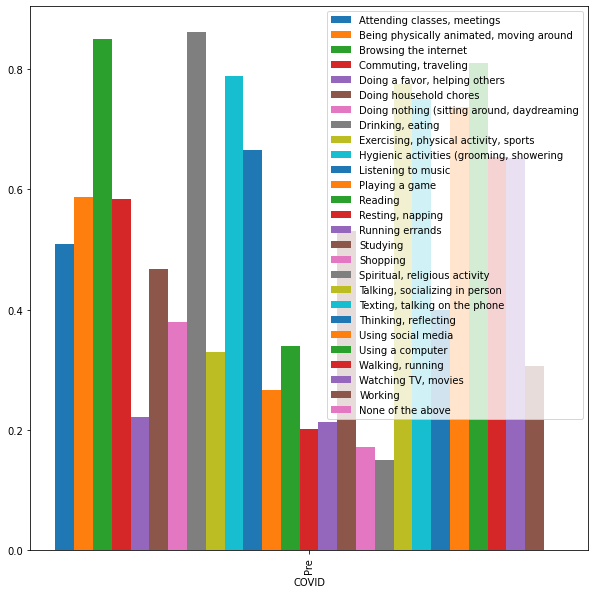

In [39]:
import matplotlib.pyplot as plt

ya.drop(['record_id', 'age_group'], axis = 1).groupby('COVID').mean().plot.bar(figsize = (10, 10), width = 5)

In [40]:
oa.drop(['record_id', 'age_group'], axis = 1).groupby('COVID').mean()

,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",Doing household chores,"Doing nothing (sitting around, daydreaming","Drinking, eating","Exercising, physical activity, sports","Hygienic activities (grooming, showering",...,"Spiritual, religious activity","Talking, socializing in person","Texting, talking on the phone","Thinking, reflecting",Using social media,Using a computer,"Walking, running","Watching TV, movies",Working,None of the above
COVID,,,,,,,,,,,,,,,,,,,,,
Post,0.035714,0.753102,0.861833,0.244589,0.142857,0.925325,0.070707,0.955556,0.685426,0.813997,...,0.250000,0.380303,0.621861,0.260245,0.269481,0.877633,0.742063,0.565368,0.057143,0.0
Pre,0.196429,0.894048,0.666667,0.597619,0.177381,0.738095,0.414286,0.965476,0.719048,0.896429,...,0.053571,0.796429,0.763095,0.490476,0.232143,0.628571,0.722619,0.877381,0.000000,0.0


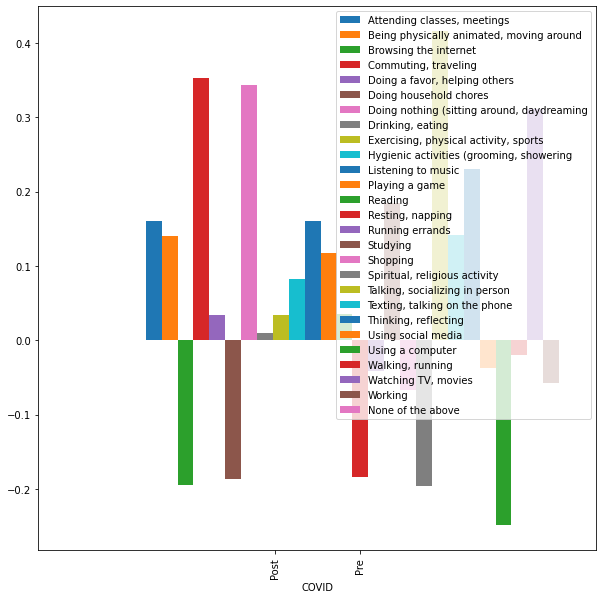

In [41]:
oa.drop(['record_id', 'age_group'], axis = 1).groupby('COVID').mean().diff().plot.bar(figsize = (10, 10), width = 5)

In [87]:
from pathlib import Path

home_dir = str(Path.home())
data_dir = os.path.join(home_dir, 'Box/CogNeuroLab/Wearables/data/')

cr_act = pd.read_csv(data_dir + 'actiwatch/cr_act.csv')
cr_fit = pd.read_csv(data_dir + 'fitbit/cr_fit.csv')

In [88]:
cr_fit

,Unnamed: 0,actmin_7,amp_7,alpha_7,beta_7,phi_7,actmin_8,amp_8,alpha_8,beta_8,...,actmin_9,amp_9,alpha_9,beta_9,phi_9,actmin_10,amp_10,alpha_10,beta_10,phi_10
0,10011,1.498280e-01,1.273941e+00,0.485009,-103.793422,1.934184,5.499584e-03,1.512651e+00,0.575390,-8.891799,...,-3.061485e-04,1.579498e+00,0.569379,-8.586889,1.971324,1.140916e+00,-4.261664e+00,-14.074745,-22.251637,-52.500316
1,10012,-6.410901e+00,8.866697e+00,-2.262784,0.748250,-7.154961,-6.410901e+00,8.866697e+00,-2.262784,0.748250,...,-6.410901e+00,8.866697e+00,-2.262784,0.748250,-7.154961,-6.410901e+00,8.866697e+00,-2.262784,0.748250,-7.154961
2,10014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10016,3.089956e-03,1.573217e+00,0.507209,-5.369870,-21.561872,-4.445964e-02,1.728003e+00,0.532648,-5.114050,...,-5.975025e-02,1.763454e+00,0.529335,-4.901354,2.589463,-5.975025e-02,1.763454e+00,0.529335,-4.901354,2.589463
4,10023,-4.162423e-01,1.898317e+00,-0.829578,7.660312,-6.727331,-2.373019e+00,3.958145e+00,-1.102268,4.176345,...,-5.666754e+00,7.281475e+00,-1.363325,3.485568,-6.529643,-1.182390e-01,1.724487e+00,-0.818430,10.443968,-6.709902
5,10024,9.391136e-02,1.407384e+00,-0.730184,80.651553,-6.498182,-2.853713e-02,1.599325e+00,-0.769046,15.164640,...,-4.042464e-02,1.662724e+00,-0.762861,13.656660,-6.718875,-3.453266e-02,1.684204e+00,-0.760088,13.661519,-6.728423
6,10025,2.060434e-01,1.358972e+00,-0.480184,8.222317,-4.853813,2.529416e-01,1.323455e+00,-0.508819,13.341673,...,2.263066e-01,1.410208e+00,-0.531714,10.994653,-4.766890,-2.993769e+00,4.729876e+00,-1.199374,2.857966,-5.489378
7,10033,1.536080e+00,-1.484628e+00,-0.581124,-65.531039,-9.599399,1.549015e+00,-1.497881e+00,-0.582442,-55.572184,...,1.615447e+00,-1.563355e+00,-0.580480,-51.471342,-9.587446,5.408549e-02,1.601614e+00,0.584732,-48.973293,2.387816
8,10035,1.088797e-01,1.349586e+00,-0.613020,252.822366,-6.871241,1.257789e-01,1.463653e+00,-0.610337,440.765781,...,1.293256e-01,1.496312e+00,-0.610180,440.777116,-6.864791,1.332177e-01,1.540560e+00,0.609982,-440.856547,-18.864421
9,10038,NaN,NaN,NaN,NaN,NaN,1.635671e-01,1.277282e+00,-0.626480,387.089882,...,1.470486e+00,-1.278021e+00,-0.627187,-1511.220750,-8.015321,2.093756e-01,1.284383e+00,-0.646601,183.023943,-7.898776


In [89]:
cr_10 = cr_fit.set_index("Unnamed: 0")
cr_10 = cr_10.filter(regex=("_10.*"))
cr_10

,actmin_10,amp_10,alpha_10,beta_10,phi_10
Unnamed: 0,,,,,
10011,1.140916e+00,-4.261664e+00,-14.074745,-22.251637,-52.500316
10012,-6.410901e+00,8.866697e+00,-2.262784,0.748250,-7.154961
10014,NaN,NaN,NaN,NaN,NaN
10016,-5.975025e-02,1.763454e+00,0.529335,-4.901354,2.589463
10023,-1.182390e-01,1.724487e+00,-0.818430,10.443968,-6.709902
10024,-3.453266e-02,1.684204e+00,-0.760088,13.661519,-6.728423
10025,-2.993769e+00,4.729876e+00,-1.199374,2.857966,-5.489378
10033,5.408549e-02,1.601614e+00,0.584732,-48.973293,2.387816
10035,1.332177e-01,1.540560e+00,0.609982,-440.856547,-18.864421


In [72]:
df['record_id'] = np.where(df['age_group'] == 'Younger Adults', '1' + df['record_id'].astype(str).str.rjust(4, fillchar = '0'), '2' + df['record_id'].astype(str).str.rjust(4, fillchar = '0'))

KeyError: 'record_id'

In [90]:
df.index = df.index.astype(str)
cr_10.index = cr_10.index.astype(str)

In [129]:
new = df.join(cr_10)
new

,age_group,COVID,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",Doing household chores,"Doing nothing (sitting around, daydreaming","Drinking, eating",...,Using a computer,"Walking, running","Watching TV, movies",Working,None of the above,actmin_10,amp_10,alpha_10,beta_10,phi_10
record_id,,,,,,,,,,,,,,,,,,,,,
10011,Younger Adults,Pre,0.000000,0.461538,1.000000,1.000000,0.000000,0.307692,0.153846,0.923077,...,0.923077,0.923077,0.538462,1.000000,0.0,1.140916e+00,-4.261664e+00,-14.074745,-22.251637,-52.500316
10012,Younger Adults,Pre,0.642857,0.285714,1.000000,0.857143,0.071429,0.642857,0.214286,0.785714,...,1.000000,0.571429,0.571429,0.285714,0.0,-6.410901e+00,8.866697e+00,-2.262784,0.748250,-7.154961
10014,Younger Adults,Pre,0.000000,0.416667,0.833333,0.500000,0.000000,0.500000,0.583333,0.666667,...,0.583333,0.333333,1.000000,0.416667,0.0,NaN,NaN,NaN,NaN,NaN
10016,Younger Adults,Pre,0.571429,0.071429,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.928571,0.857143,0.928571,0.714286,0.0,-5.975025e-02,1.763454e+00,0.529335,-4.901354,2.589463
10023,Younger Adults,Pre,0.785714,0.500000,0.785714,0.071429,0.214286,0.142857,0.142857,0.785714,...,0.428571,0.214286,0.285714,0.000000,0.0,-1.182390e-01,1.724487e+00,-0.818430,10.443968,-6.709902
10024,Younger Adults,Pre,0.769231,0.923077,1.000000,0.153846,0.384615,0.076923,0.923077,1.000000,...,0.769231,0.923077,0.692308,0.000000,0.0,-3.453266e-02,1.684204e+00,-0.760088,13.661519,-6.728423
10025,Younger Adults,Pre,0.428571,0.857143,0.500000,0.142857,0.000000,0.214286,0.500000,0.928571,...,0.857143,0.071429,0.857143,0.000000,0.0,-2.993769e+00,4.729876e+00,-1.199374,2.857966,-5.489378
10033,Younger Adults,Pre,0.615385,0.692308,0.846154,0.923077,0.000000,0.384615,0.307692,1.000000,...,1.000000,0.923077,1.000000,0.692308,0.0,5.408549e-02,1.601614e+00,0.584732,-48.973293,2.387816
10035,Younger Adults,Pre,0.500000,1.000000,1.000000,0.916667,0.916667,0.583333,1.000000,1.000000,...,1.000000,1.000000,0.416667,0.000000,0.0,1.332177e-01,1.540560e+00,0.609982,-440.856547,-18.864421


In [130]:
new['age_group'] = new['age_group'].astype('category')
new['age_group']= new['age_group'].cat.set_categories(["Younger Adults", "Older Adults"], ordered = True)
new['COVID'] = new['COVID'].astype('category')
new['COVID'] = new['COVID'].cat.set_categories(["Pre", "Post"], ordered = True)

In [110]:
new

,age_group,COVID,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",Doing household chores,"Doing nothing (sitting around, daydreaming","Drinking, eating",...,Using a computer,"Walking, running","Watching TV, movies",Working,None of the above,actmin_10,amp_10,alpha_10,beta_10,phi_10
record_id,,,,,,,,,,,,,,,,,,,,,
10011,Younger Adults,Pre,0.000000,0.461538,1.000000,1.000000,0.000000,0.307692,0.153846,0.923077,...,0.923077,0.923077,0.538462,1.000000,0.0,1.140916e+00,-4.261664e+00,-14.074745,-22.251637,-52.500316
10012,Younger Adults,Pre,0.642857,0.285714,1.000000,0.857143,0.071429,0.642857,0.214286,0.785714,...,1.000000,0.571429,0.571429,0.285714,0.0,-6.410901e+00,8.866697e+00,-2.262784,0.748250,-7.154961
10014,Younger Adults,Pre,0.000000,0.416667,0.833333,0.500000,0.000000,0.500000,0.583333,0.666667,...,0.583333,0.333333,1.000000,0.416667,0.0,NaN,NaN,NaN,NaN,NaN
10016,Younger Adults,Pre,0.571429,0.071429,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.928571,0.857143,0.928571,0.714286,0.0,-5.975025e-02,1.763454e+00,0.529335,-4.901354,2.589463
10023,Younger Adults,Pre,0.785714,0.500000,0.785714,0.071429,0.214286,0.142857,0.142857,0.785714,...,0.428571,0.214286,0.285714,0.000000,0.0,-1.182390e-01,1.724487e+00,-0.818430,10.443968,-6.709902
10024,Younger Adults,Pre,0.769231,0.923077,1.000000,0.153846,0.384615,0.076923,0.923077,1.000000,...,0.769231,0.923077,0.692308,0.000000,0.0,-3.453266e-02,1.684204e+00,-0.760088,13.661519,-6.728423
10025,Younger Adults,Pre,0.428571,0.857143,0.500000,0.142857,0.000000,0.214286,0.500000,0.928571,...,0.857143,0.071429,0.857143,0.000000,0.0,-2.993769e+00,4.729876e+00,-1.199374,2.857966,-5.489378
10033,Younger Adults,Pre,0.615385,0.692308,0.846154,0.923077,0.000000,0.384615,0.307692,1.000000,...,1.000000,0.923077,1.000000,0.692308,0.0,5.408549e-02,1.601614e+00,0.584732,-48.973293,2.387816
10035,Younger Adults,Pre,0.500000,1.000000,1.000000,0.916667,0.916667,0.583333,1.000000,1.000000,...,1.000000,1.000000,0.416667,0.000000,0.0,1.332177e-01,1.540560e+00,0.609982,-440.856547,-18.864421


/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

Text(0.5, 0.98, 'Rest-Activity Measures by Age Group and Before vs During COVID-19')

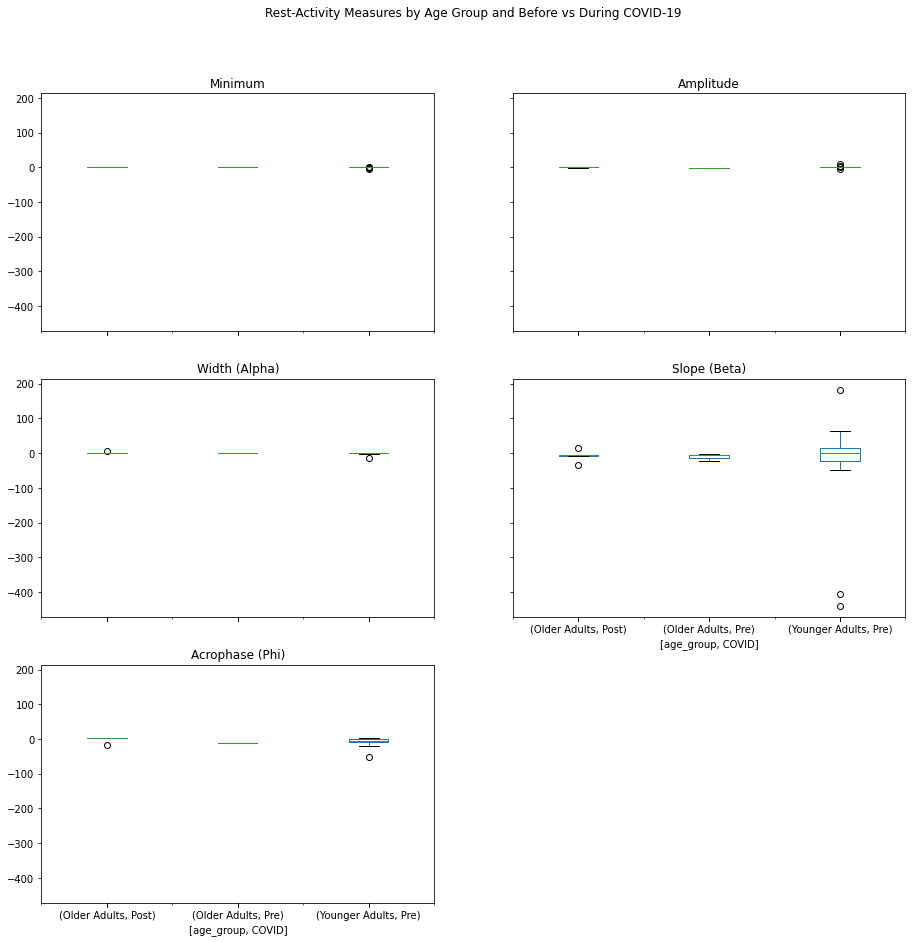

In [92]:
ax = new[['age_group','COVID', 'actmin_10', 'amp_10', 'alpha_10', 'beta_10', 'phi_10']].boxplot(column = ['actmin_10', 'amp_10', 'alpha_10', 'beta_10', 'phi_10'], by = ['age_group','COVID'], figsize = (15, 15), grid = False)
ax[0,0].title.set_text('Minimum')
ax[0,1].title.set_text('Amplitude')
ax[1,0].title.set_text('Width (Alpha)')
ax[1,1].title.set_text('Slope (Beta)')
ax[2,0].title.set_text('Acrophase (Phi)')
plt.suptitle('Rest-Activity Measures by Age Group and Before vs During COVID-19')


/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

Text(0.5, 0.98, 'Rest-Activity Measures in Older Adults Before vs During COVID-19')

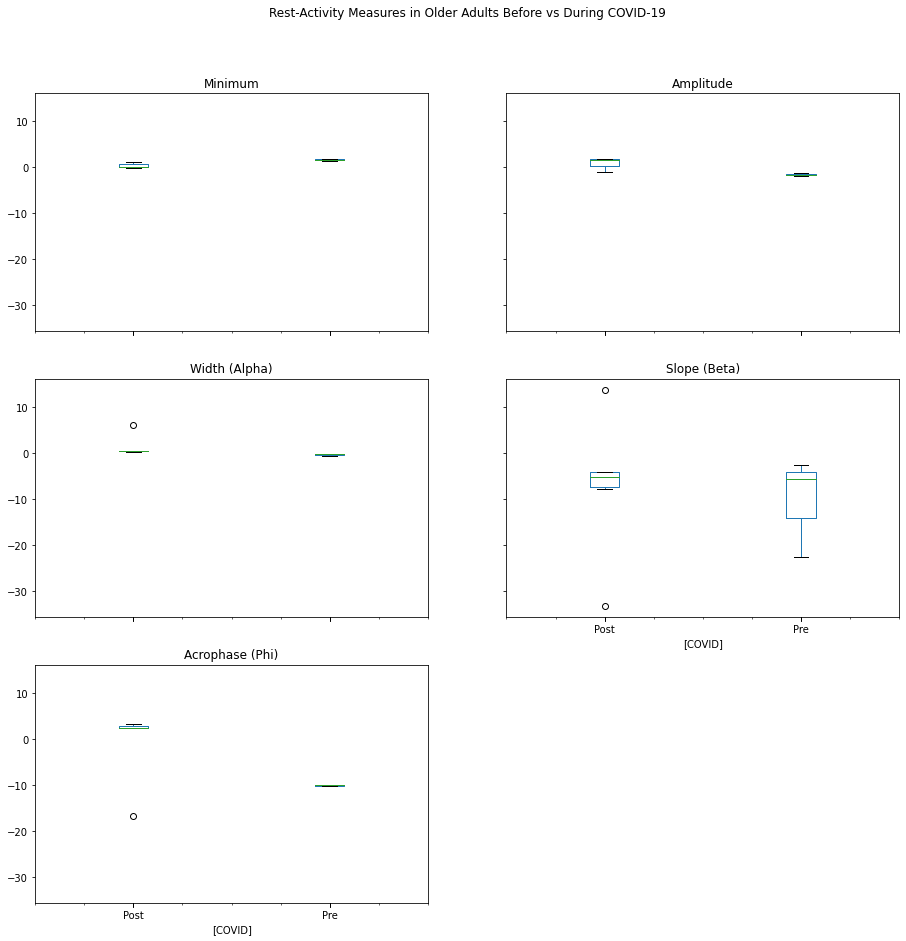

In [93]:
ax = new[new['age_group'] == "Older Adults"][['COVID', 'actmin_10', 'amp_10', 'alpha_10', 'beta_10', 'phi_10']].boxplot(column = ['actmin_10', 'amp_10', 'alpha_10', 'beta_10', 'phi_10'], by = ['COVID'], figsize = (15, 15), grid = False)
ax[0,0].title.set_text('Minimum')
ax[0,1].title.set_text('Amplitude')
ax[1,0].title.set_text('Width (Alpha)')
ax[1,1].title.set_text('Slope (Beta)')
ax[2,0].title.set_text('Acrophase (Phi)')
plt.suptitle('Rest-Activity Measures in Older Adults Before vs During COVID-19')


/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


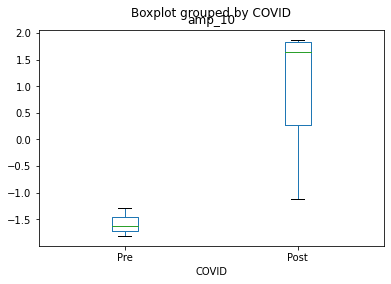

In [151]:
new[new['age_group'] == 'Older Adults'].boxplot('amp_10', by = 'COVID', grid = False)

## PVT and rhythm amplitude

In [136]:
pvt = pd.read_csv(data_dir + 'PVT/pvt_results.csv', na_values = 'nan', keep_default_na = True)
pvt = pvt.set_index('record_id').astype(str)
pvt = pvt.astype(float)
pvt

,Unnamed: 0,RT,FS,NR
record_id,,,,
10011,0.0,0.287571,0.0,0.0
10012,1.0,0.292187,3.0,0.0
10014,2.0,0.343802,6.0,0.0
10023,3.0,0.295579,2.0,0.0
10024,4.0,0.286903,1.0,0.0
10025,5.0,0.245413,1.0,0.0
10033,6.0,0.343700,0.0,0.0
10035,7.0,0.267186,1.0,0.0
10038,8.0,0.270828,2.0,0.0


In [159]:
n = new.join(pvt)
n = n[n['RT'] < 6.5]
ya = n[n['age_group'] == "Younger Adults"]
oa = n[n['age_group'] == "Older Adults"]

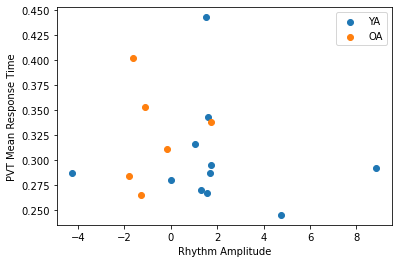

In [169]:
plt.scatter(ya['amp_10'].values, ya['RT'].values, label = "YA")
plt.scatter(oa['amp_10'].values, oa['RT'].values, label = "OA")
plt.xlabel("Rhythm Amplitude")
plt.ylabel("PVT Mean Response Time")
plt.legend()

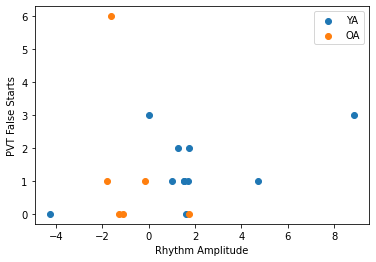

In [170]:
plt.scatter(ya['amp_10'].values, ya['FS'].values, label = "YA")
plt.scatter(oa['amp_10'].values, oa['FS'].values, label = "OA")
plt.xlabel("Rhythm Amplitude")
plt.ylabel("PVT False Starts")
plt.legend()

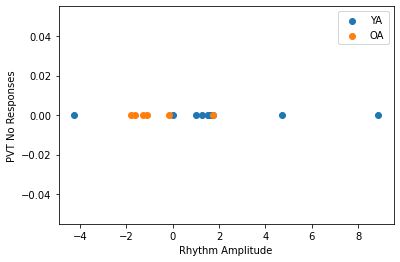

In [171]:
plt.scatter(ya['amp_10'].values, ya['NR'].values, label = "YA")
plt.scatter(oa['amp_10'].values, oa['NR'].values, label = "OA")
plt.xlabel("Rhythm Amplitude")
plt.ylabel("PVT No Responses")
plt.legend()

## PVT and acrophase

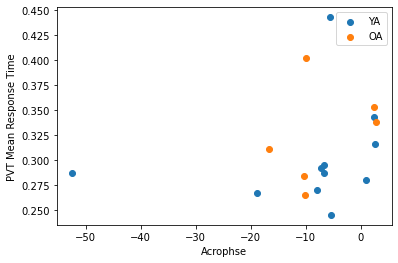

In [166]:
plt.scatter(ya['phi_10'].values, ya['RT'].values, label = "YA")
plt.scatter(oa['phi_10'].values, oa['RT'].values, label = "OA")
plt.xlabel("Acrophse")
plt.ylabel("PVT Mean Response Time")
plt.legend()

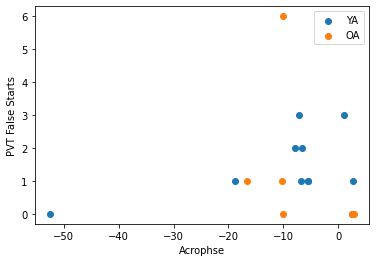

In [167]:
plt.scatter(ya['phi_10'].values, ya['FS'].values, label = "YA")
plt.scatter(oa['phi_10'].values, oa['FS'].values, label = "OA")
plt.xlabel("Acrophse")
plt.ylabel("PVT False Starts")
plt.legend()

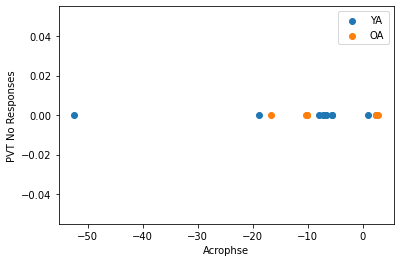

In [168]:
plt.scatter(ya['phi_10'].values, ya['NR'].values, label = "YA")
plt.scatter(oa['phi_10'].values, oa['NR'].values, label = "OA")
plt.xlabel("Acrophse")
plt.ylabel("PVT No Responses")
plt.legend()